In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [128]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [129]:
df.shape

(7043, 21)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


totalChanges lists as object(String) instead of a number,

In [131]:
df.isna().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no NaN values but is some error. let's fix it

In [132]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].dtype

dtype('float64')

In [133]:
df.isna().sum()   

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

now we can detect dome missing values.

In [134]:
df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


since "tenure" == 0 ,means they are new customers. so we can fill empty values from "0".

In [135]:
df["TotalCharges"].fillna(0, inplace=True)
df.isna().sum()

C:\Users\Nisitha Nimsara\AppData\Local\Temp\ipykernel_4448\3911093746.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(0, inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [136]:
df.drop("customerID", axis=1, inplace=True) #customerID is dropped as it is not useful for analysis

df["Churn_Binary"] = df["Churn"].map({"Yes": 1, "No": 0}) #Creating a binary column for Churn

In [137]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist() #Numerical columns created

categorical_cols = df.select_dtypes(include=["object"]).columns.tolist() #categorical columns created

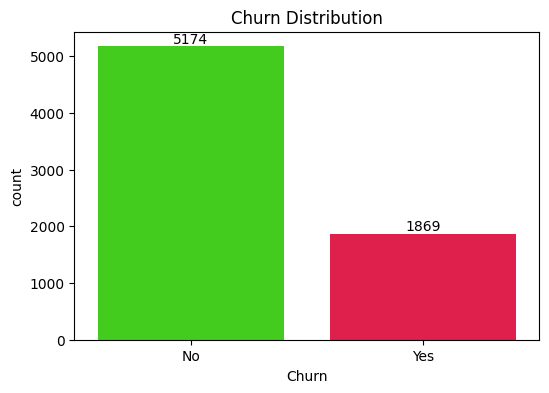

In [138]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="Churn", hue="Churn", palette="prism")
plt.title("Churn Distribution")

# show value on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x position (middle of bar)
        height,                         # y position (top of bar)
        int(height),                    # text = count
        ha='center',
        va='bottom'
    )

plt.show()


According to the graph, 26% - 27% of customers churned and about 73–74% stayed.

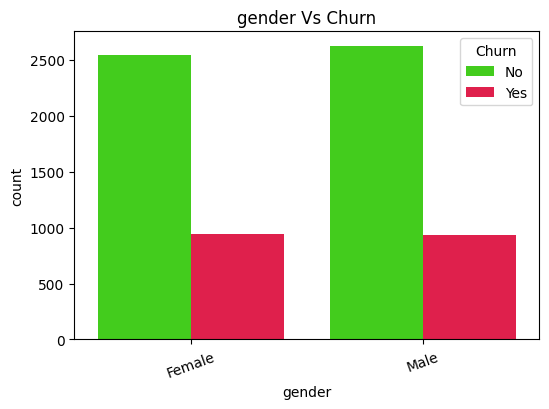

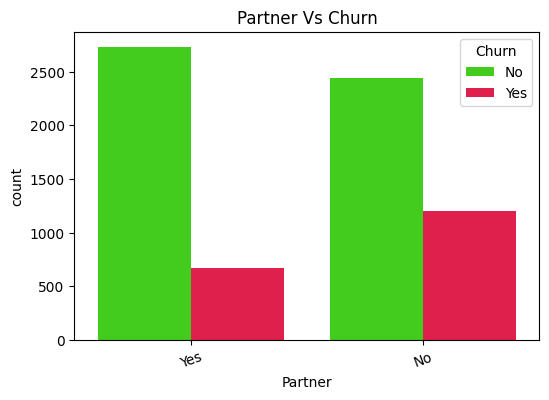

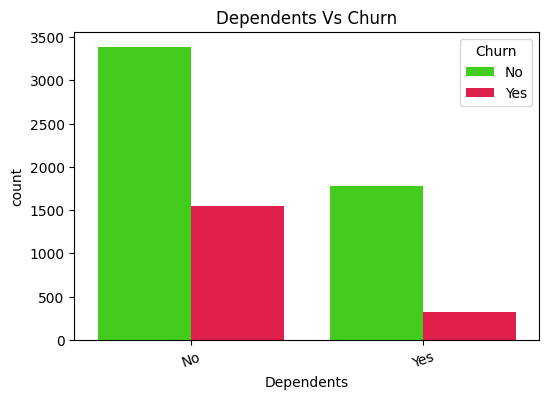

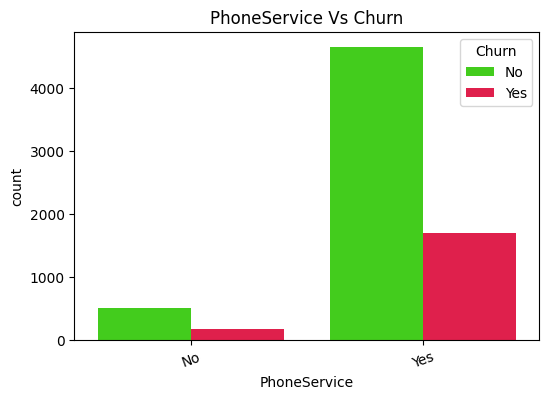

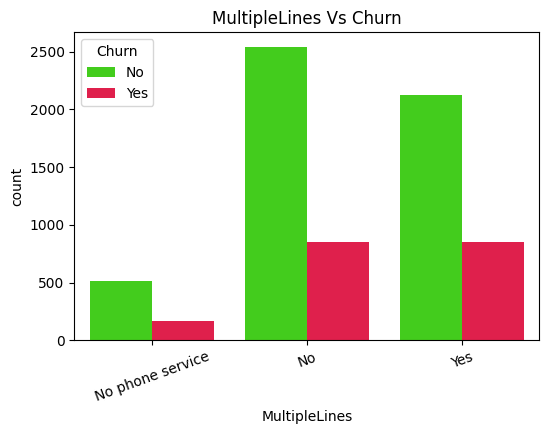

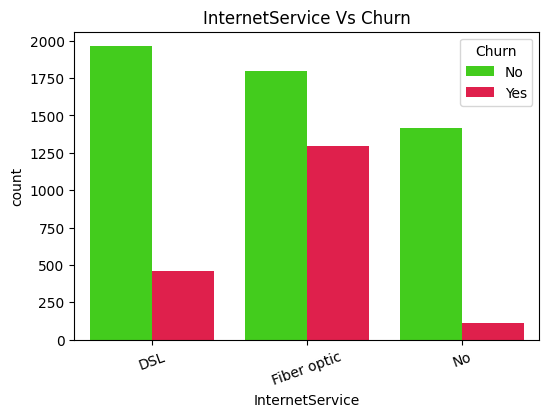

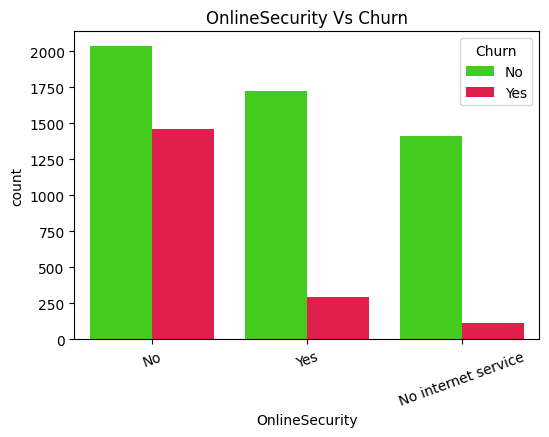

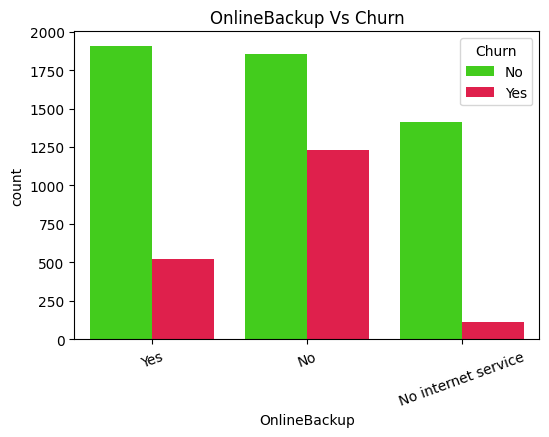

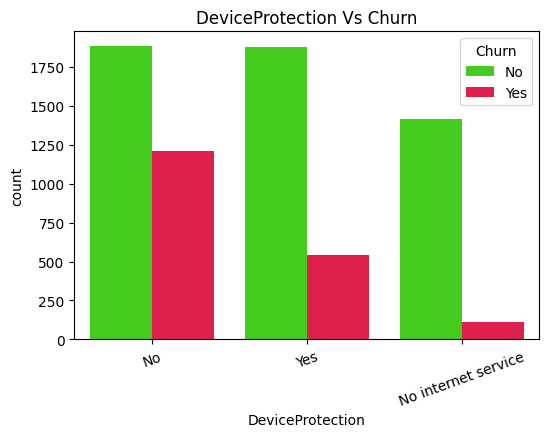

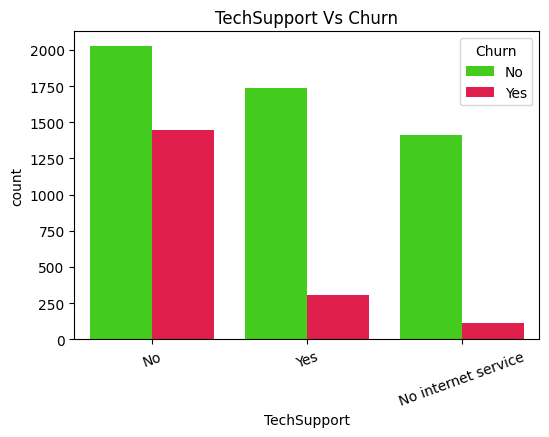

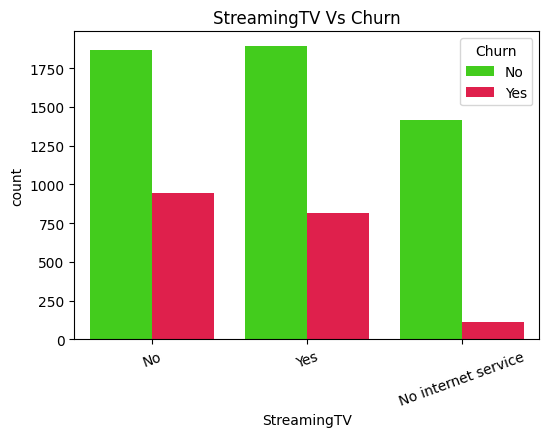

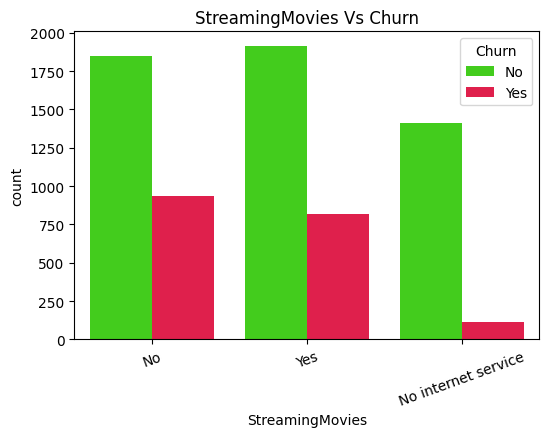

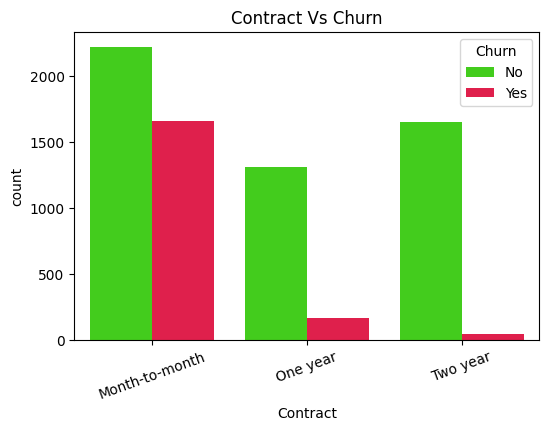

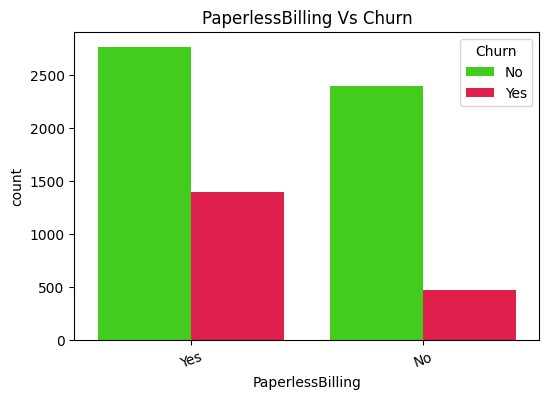

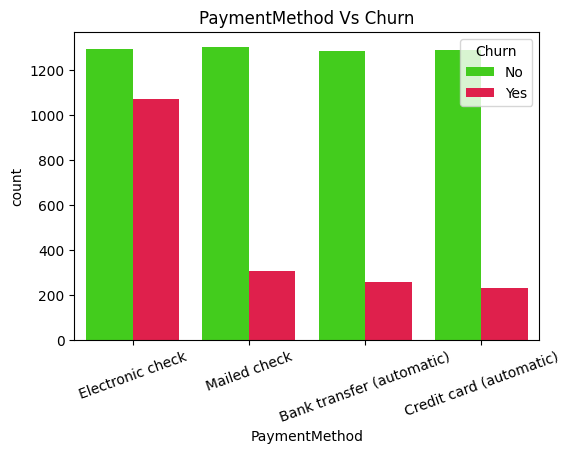

In [139]:
for col in categorical_cols:
    if col == "Churn":
        continue
    
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue="Churn", palette="prism")
    plt.xticks(rotation=20)
    plt.title(f"{col} Vs Churn")
    plt.show()


Contract type:
Month-to-month customers have much higher churn than customers on 1-year or 2-year contracts. 
Longer contracts (1 or 2 years) are associated with more loyal customers.

Payment method:
Customers that does payings using Electronic check usually show the highest churn rate, compared to credit card or bank transfer. 

PaperlessBilling:
Customers with Paperless Billings tend to churn.

InternetService:
Customers who have Five-optic tends to churn than other parties.

OnlineSecurity / TechSupport / DiviceProtection:
Customers with no online security or no tech support typically churn more. Having these services is protective against churn. 

OnlineBackup:
Customers who didn't have onlinne backups tends to churn more then the rest.

Partner / Dependents:
Customers without a partner or without dependents tend to churn more often.

(2230, 21)


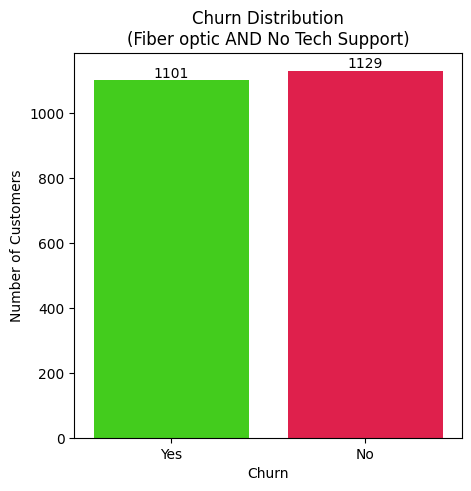

In [140]:
risk_df = df[(df["InternetService"] == "Fiber optic") & (df["TechSupport"] == "No")]
print(risk_df.shape)

plt.figure(figsize=(5, 5))
ax =sns.countplot(data=risk_df, x="Churn", hue="Churn", palette="prism")
plt.title("Churn Distribution\n(Fiber optic AND No Tech Support)")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

# show value on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x position (middle of bar)
        height,                         # y position (top of bar)
        int(height),                    # text = count
        ha='center',
        va='bottom'
    )


plt.show()


According to the graph of Customers with Fiber-optic (InternetService) and No TechSupport, can be seen ~49% chance to be churn.

(1850, 21)


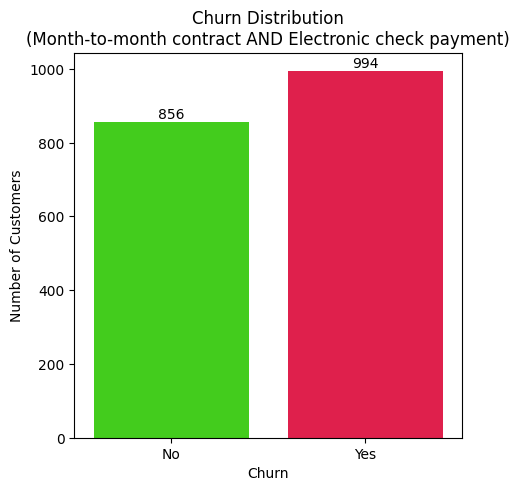

In [141]:
risk_df = df[(df["Contract"] == "Month-to-month") & (df["PaymentMethod"] == "Electronic check")]
print(risk_df.shape)

plt.figure(figsize=(5, 5))
ax = sns.countplot(data=risk_df, x="Churn", hue="Churn", palette="prism")
plt.title("Churn Distribution\n(Month-to-month contract AND Electronic check payment)")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

# show value on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # x position (middle of bar)
        height,                         # y position (top of bar)
        int(height),                    # text = count
        ha='center',
        va='bottom'
    )


plt.show()

According to the graph of Customers with Month-to-month (Contract) and use Electronic check as payment, can be seen ~54% chance to be churn.

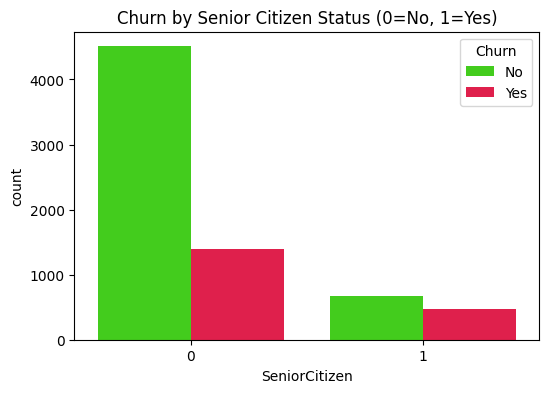

In [142]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='prism')
plt.title('Churn by Senior Citizen Status (0=No, 1=Yes)')
plt.show()

senior citizens churn at around ~40%, while non-seniors churn near ~23%.
However, seniors are a smaller share of the customer base overall, so they drive part of churn, but not all of it.

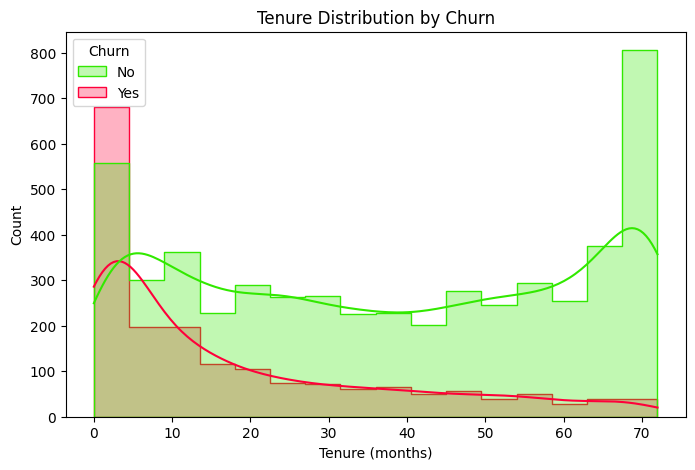

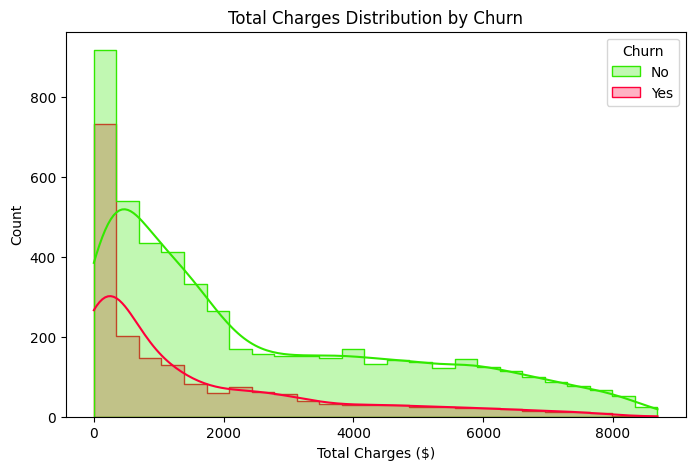

In [143]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", palette="prism", kde=True, element='step',  alpha=0.3)
plt.title("Tenure Distribution by Churn")
plt.ylabel("Count")
plt.xlabel("Tenure (months)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="TotalCharges", hue="Churn", palette="prism", kde=True, element='step', alpha=0.3)
plt.title("Total Charges Distribution by Churn")
plt.ylabel("Count")
plt.xlabel("Total Charges ($)")
plt.show()

first graph can identify two customer types based on tenure value as new customers and long term customers. according to the graph can find a big spike in churn during months 1 - 6 and then dropping it accordingly with the tenure increases.

Second graph also represent some high spick in lower total charges. 

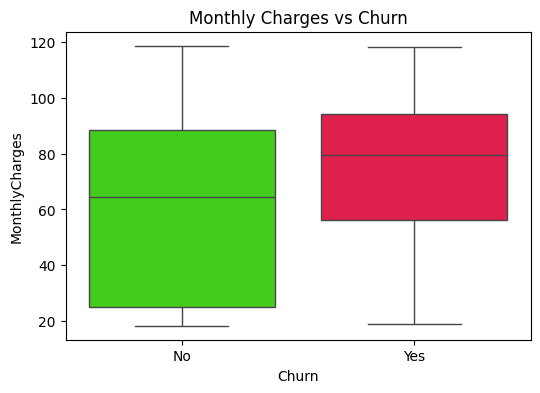

In [144]:
# Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, hue="Churn" , palette="prism")
plt.title('Monthly Charges vs Churn')
plt.show()

Churned customers generally have higher median monthly charges and often a wider spread. maybe High monthly bills could be the reason. 
Non-churn customers’ monthly charges tend to be lower and more concentrated.

In [145]:
corr_matrix_N = df[numerical_cols].corr()

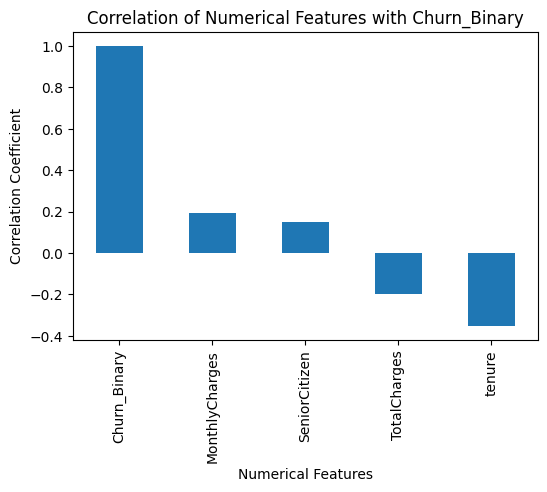

In [146]:
plt.figure(figsize=(6,4))
plt.title("Correlation of Numerical Features with Churn_Binary")
corr_matrix_N["Churn_Binary"].sort_values(ascending = False).plot(kind="bar")
plt.xlabel("Numerical Features")
plt.ylabel("Correlation Coefficient")
plt.show()

Tenure has a negative correlation, longer tenure -> less churn.

MonthlyCharges has a positive correlation, higher charges -> more churn.

TotalCharges often ends up close to weak negative or weak positive (it mixes tenure and price).

SeniorCitizen tends to show a moderate positive correlation (seniors churn more).

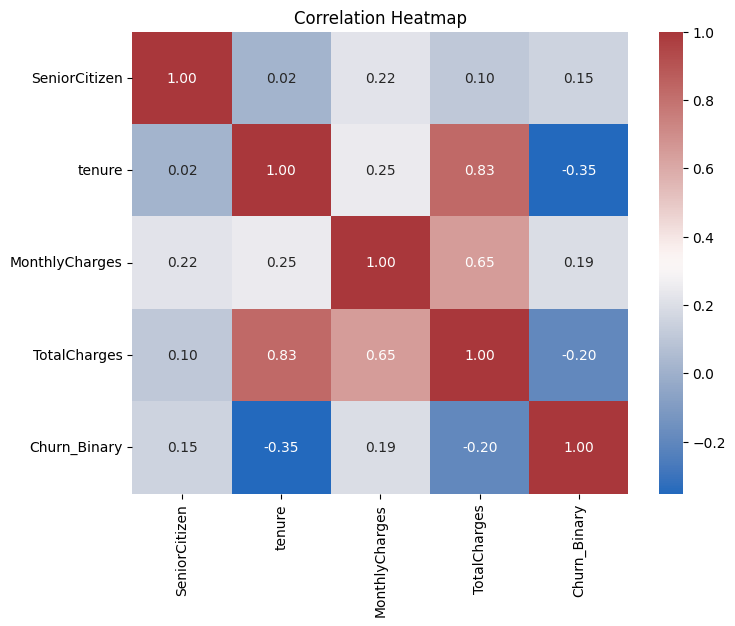

In [147]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_N, annot=True, cmap="vlag", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

positively correlationa; 
tenure - TotalCharger (0.83), 
monthlyCharges - TotalCharge (0.65), 
tenure - MonthlyCharges (0.25), 
Monthlycharges - churn_binary (0.19), 
sineorcitizen - churn_binary (0.15), 

Negative correlation; 
tenure - churn_binary (-0.35), 
totalCharger - churn_binary (-0.20).

In [148]:
df_encoded = df.copy()
le = LabelEncoder()

# Apply LabelEncoder to object (String) and bool columns
for col in df_encoded.select_dtypes(include=["object", "bool"]).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print(df_encoded.dtypes.value_counts())
df_encoded.head()

int64      19
float64     2
Name: count, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Binary
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,0
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,1


Turn categorical and boolean features to numerical values

In [149]:
corr_matrix_C = df_encoded.corr()

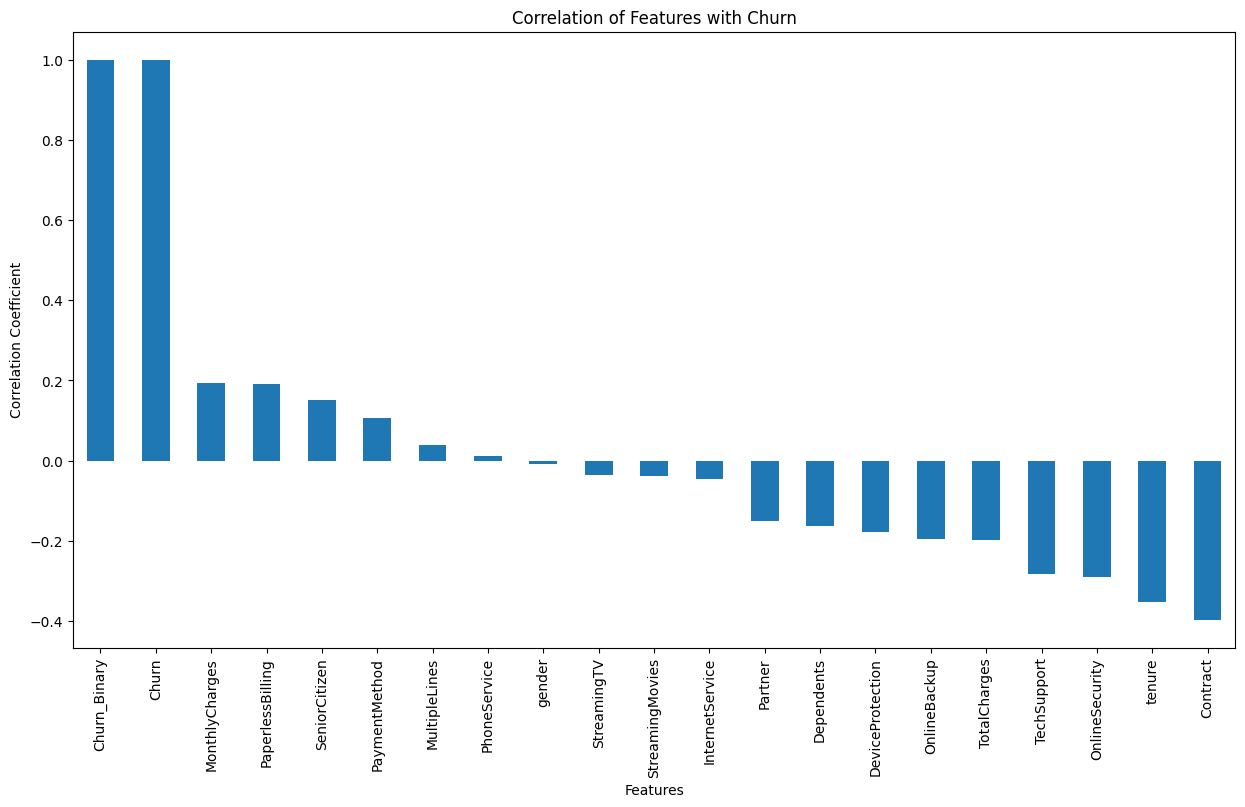

In [150]:
plt.figure(figsize=(15,8))
plt.title("Correlation of Features with Churn")
corr_matrix_C["Churn"].sort_values(ascending = False).plot(kind="bar")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()


Grahp shows high correlation (positive with churn) for encoded variables such as, Month-to-month contract, paperlessBillings, seniorCitizen, payment, methods, multilines.

And strong negative correlations such as, contracts, tenure, Online security, Tech support, totalCharges etc.

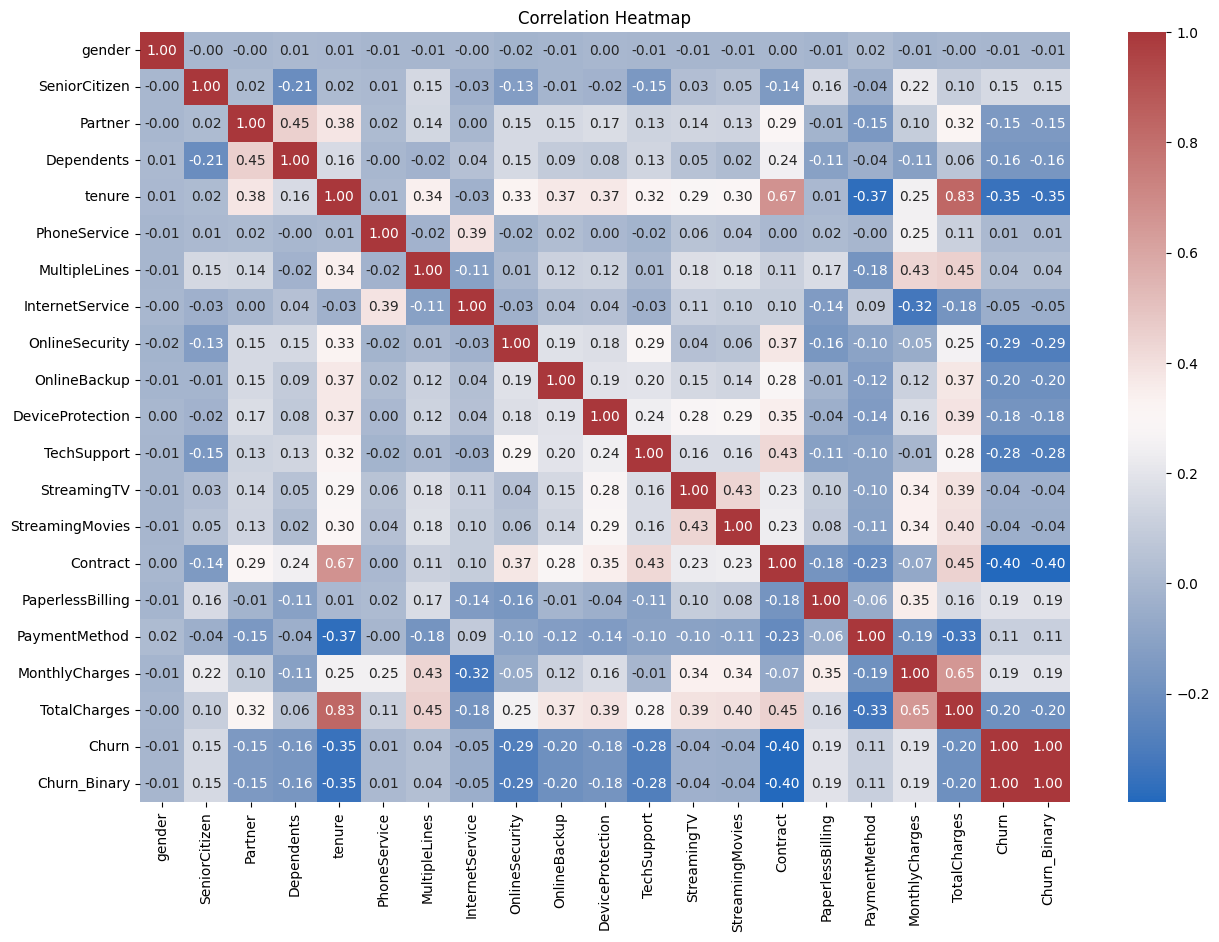

In [151]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_C, annot=True, cmap="vlag", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

This is the representation of correlation matrix between all numeric + categorical features. using this we can get valuable insights
Strongest relationships with Churn are;
    Contract (≈ -0.40), 
    Tenure (≈ -0.35), 
    OnlineSecurity (≈ -0.29), 
    TechSupport (≈ -0.28), 

and Medium relationships with Churn are;
    TotalCharges (≈ -0.20), 
    OnlineBackup (≈ -0.20), 
    DeviceProtection (≈ -0.18), 
    MonthlyCharges (≈ +0.19), 
    PaperlessBilling (≈ +0.19), 

and Weaker relationship with Churn are;
    Dependents (≈ -0.16), 
    Partner (≈ -0.15), 
    SeniorCitizen (≈ +0.15), 

and also Very strong maybe be almost “duplicate informations”;
    Tenure vs TotalCharges (≈ +0.83), 
    Tenure vs Contract (≈ +0.68), 
    MonthlyCharges vs TotalCharges (≈ +0.65), 

and Other notables; 
    Partner vs Dependents (≈ +0.45), 
    MultipleLines vs TotalCharges (≈ +0.45), 
    MultipleLines vs MonthlyCharges (≈ +0.43), 
    Contract vs TotalCharges (≈ +0.45), 
    StreamingTV vs StreamingMovies (≈ +0.44), 
    TechSupport vs Contract (≈ +0.43).
